Simple CNN Model to help establish deep-learning baseline.
Balancing of dataset: Subset of categories where majority of data is and non-neural augmentation (random sample and repeats) of minority data

Model - 3 Layer CNN with Dense layer for multiclass image classification

In [10]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from google.colab import drive
from sklearn.metrics import confusion_matrix
import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip '/content/drive/MyDrive/HAM10000_metadata_gc.zip'

Archive:  /content/drive/MyDrive/HAM10000_metadata_gc.zip
  inflating: HAM10000_metadata       


In [ ]:
! unzip '/content/drive/MyDrive/HAM10000_images_part_1_gc'

In [ ]:
! unzip '/content/drive/MyDrive/HAM10000_images_part_2_gc'

In [4]:
md = pd.read_csv("/content/HAM10000_metadata")
md

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [61]:
#resize images - easier to handle 32X32
im_size = 32

In [62]:
#label encoding: going from text to numerical
lab_enc = LabelEncoder()
lab_enc.fit(md['dx'])
LabelEncoder()
print(list(lab_enc.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [63]:
#label column in md - diagnosis and numerical label in one dataset
md['label'] = lab_enc.transform(md["dx"]) 

md

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,/content/HAM10000_images_part_2/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0032854.jpg


In [64]:
#get all file paths and make a new column
fldr1 = '/content/HAM10000_images_part_1'
fldr2 = '/content/HAM10000_images_part_2'

im_paths = []

for i in md['image_id']:
  fid = i

  fn = '/' + fid + '.jpg'

  if os.path.isfile(fldr1 + fn) == True:
    im_paths.append(fldr1+fn)
  else:
    im_paths.append(fldr2+fn)

In [65]:
md['image_paths'] = im_paths

In [66]:
md

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,/content/HAM10000_images_part_2/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0032854.jpg


In [67]:
#seperate data into diagnoses
dx_0 = md[md['label'] == 0]
dx_1 = md[md['label'] == 1]
dx_2 = md[md['label'] == 2]
dx_3 = md[md['label'] == 3]
dx_4 = md[md['label'] == 4]
dx_5 = md[md['label'] == 5]
dx_6 = md[md['label'] == 6]

In [68]:
from pandas.core.common import random_state
#subset and random resample of data by diagnosis
n = 1000
dx_0_balanced = resample(dx_0, replace=True, n_samples=n, random_state=42) 
dx_1_balanced = resample(dx_1, replace=True, n_samples=n, random_state=42) 
dx_2_balanced = resample(dx_2, replace=True, n_samples=n, random_state=42)
dx_3_balanced = resample(dx_3, replace=True, n_samples=n, random_state=42)
dx_4_balanced = resample(dx_4, replace=True, n_samples=n, random_state=42)
dx_5_balanced = resample(dx_5, replace=True, n_samples=n, random_state=42)
dx_6_balanced = resample(dx_6, replace=True, n_samples=n, random_state=42)

In [69]:
dx_6_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths
2422,HAM_0006796,ISIC_0025707,vasc,consensus,35.0,male,trunk,vidir_molemax,6,/content/HAM10000_images_part_1/ISIC_0025707.jpg
2412,HAM_0000934,ISIC_0031706,vasc,consensus,60.0,male,trunk,vidir_molemax,6,/content/HAM10000_images_part_2/ISIC_0031706.jpg
2334,HAM_0002218,ISIC_0025578,vasc,histo,5.0,male,back,vidir_modern,6,/content/HAM10000_images_part_1/ISIC_0025578.jpg
2426,HAM_0005215,ISIC_0028406,vasc,consensus,80.0,male,abdomen,vidir_molemax,6,/content/HAM10000_images_part_1/ISIC_0028406.jpg
2391,HAM_0001566,ISIC_0031346,vasc,consensus,70.0,female,face,vidir_modern,6,/content/HAM10000_images_part_2/ISIC_0031346.jpg
...,...,...,...,...,...,...,...,...,...,...
2366,HAM_0006946,ISIC_0032614,vasc,histo,55.0,female,back,vidir_modern,6,/content/HAM10000_images_part_2/ISIC_0032614.jpg
2330,HAM_0006617,ISIC_0028163,vasc,histo,25.0,female,abdomen,vidir_modern,6,/content/HAM10000_images_part_1/ISIC_0028163.jpg
2449,HAM_0005427,ISIC_0028885,vasc,consensus,75.0,male,back,vidir_molemax,6,/content/HAM10000_images_part_1/ISIC_0028885.jpg
2438,HAM_0001780,ISIC_0024370,vasc,consensus,55.0,male,trunk,vidir_molemax,6,/content/HAM10000_images_part_1/ISIC_0024370.jpg


In [70]:
md_balanced = pd.concat([dx_0_balanced, dx_1_balanced, dx_2_balanced, dx_3_balanced, dx_4_balanced, dx_5_balanced, dx_6_balanced])

md_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,rosendahl,0,/content/HAM10000_images_part_1/ISIC_0026645.jpg
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,rosendahl,0,/content/HAM10000_images_part_1/ISIC_0025780.jpg
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,rosendahl,0,/content/HAM10000_images_part_1/ISIC_0024450.jpg
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,rosendahl,0,/content/HAM10000_images_part_1/ISIC_0027896.jpg
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,rosendahl,0,/content/HAM10000_images_part_1/ISIC_0029268.jpg
...,...,...,...,...,...,...,...,...,...,...
2366,HAM_0006946,ISIC_0032614,vasc,histo,55.0,female,back,vidir_modern,6,/content/HAM10000_images_part_2/ISIC_0032614.jpg
2330,HAM_0006617,ISIC_0028163,vasc,histo,25.0,female,abdomen,vidir_modern,6,/content/HAM10000_images_part_1/ISIC_0028163.jpg
2449,HAM_0005427,ISIC_0028885,vasc,consensus,75.0,male,back,vidir_molemax,6,/content/HAM10000_images_part_1/ISIC_0028885.jpg
2438,HAM_0001780,ISIC_0024370,vasc,consensus,55.0,male,trunk,vidir_molemax,6,/content/HAM10000_images_part_1/ISIC_0024370.jpg


In [71]:
#turn images to array and add as a new column 
md_balanced['image'] = md_balanced['image_paths'].map(lambda x: np.asarray(Image.open(x).resize((im_size,im_size))))

In [ ]:
md_balanced

In [72]:
#numpy array of all images scaled
X = np.asarray(md_balanced['image'].tolist())
X = X/255. 
Y= md_balanced['label']
Y_dx = to_categorical(Y, num_classes=7)

In [ ]:
X

In [74]:
#train/test split - 70/30 split

x_train, x_test, y_train, y_test = train_test_split(X, Y_dx, test_size=0.30, random_state=29)


In [75]:
#model 

num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(im_size, im_size, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 256)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 128)        

In [76]:
#model training

batch_size = 16 
epochs = 75

In [77]:
mod_fit = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/75
307/307 - 66s - loss: 1.8495 - acc: 0.2176 - val_loss: 1.6709 - val_acc: 0.2824 - 66s/epoch - 214ms/step
Epoch 2/75
307/307 - 61s - loss: 1.5263 - acc: 0.3741 - val_loss: 1.4114 - val_acc: 0.4314 - 61s/epoch - 197ms/step
Epoch 3/75
307/307 - 61s - loss: 1.3890 - acc: 0.4476 - val_loss: 1.3116 - val_acc: 0.4624 - 61s/epoch - 197ms/step
Epoch 4/75
307/307 - 64s - loss: 1.3310 - acc: 0.4739 - val_loss: 1.2600 - val_acc: 0.5081 - 64s/epoch - 208ms/step
Epoch 5/75
307/307 - 62s - loss: 1.2706 - acc: 0.4941 - val_loss: 1.1562 - val_acc: 0.5281 - 62s/epoch - 203ms/step
Epoch 6/75
307/307 - 68s - loss: 1.2411 - acc: 0.5084 - val_loss: 1.1262 - val_acc: 0.5690 - 68s/epoch - 221ms/step
Epoch 7/75
307/307 - 67s - loss: 1.1779 - acc: 0.5302 - val_loss: 1.1205 - val_acc: 0.5667 - 67s/epoch - 217ms/step
Epoch 8/75
307/307 - 67s - loss: 1.1557 - acc: 0.5424 - val_loss: 1.1770 - val_acc: 0.5486 - 67s/epoch - 218ms/step
Epoch 9/75
307/307 - 68s - loss: 1.1319 - acc: 0.5533 - val_loss: 1.0885

In [78]:
mod_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', mod_acc[1])

66/66 [==============================] - 6s 90ms/step - loss: 0.5024 - acc: 0.8329
Test accuracy: 0.8328571319580078


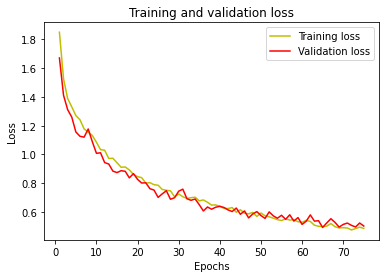

In [79]:
#loss and accuracy curves 
loss = mod_fit.history['loss']
val_loss = mod_fit.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

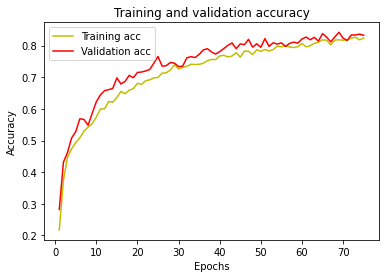

In [80]:
acc = mod_fit.history['acc']
val_acc = mod_fit.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
#predictions

y_pred = model.predict(x_test)

66/66 [==============================] - 6s 90ms/step


In [82]:
#one hot encoding --> probs from softmax to 1 and 0
y_pred_classes = np.argmax(y_pred, axis = 1) 

In [84]:
#same format as predictions
y_true = np.argmax(y_test, axis = 1) 

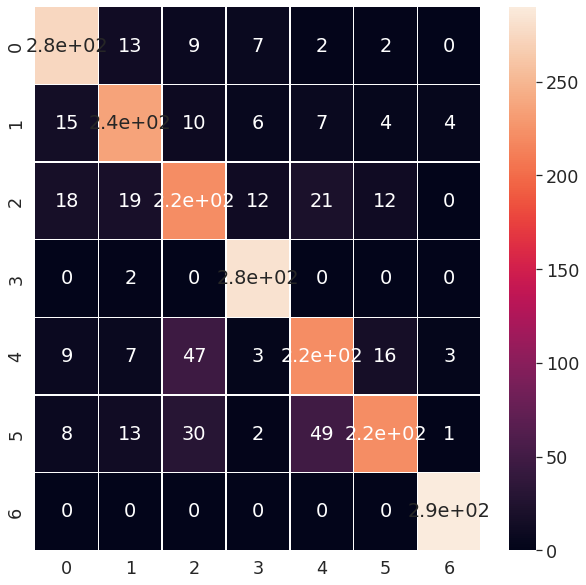

In [86]:
cm = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

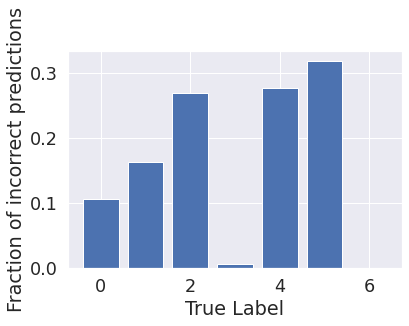

In [87]:
#percent misclassified per dx
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
#reference material
#https://github.com/bnsreenu/python_for_microscopists
#https://neptune.ai/blog/data-augmentation-in-python
#https://www.gcptutorials.com/post/reading-and-processing-images-with-tensorflow
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html
#https://stackoverflow.com/questions/70737343/nameerror-name-resample-is-not-defined
#https://stackoverflow.com/questions/16729574/how-can-i-get-a-value-from-a-cell-of-a-dataframe
#https://www.geeksforgeeks.org/add-a-keyvalue-pair-to-dictionary-in-python/
#https://www.w3schools.com/python/gloss_python_for_range.asp
#https://pandas.pydata.org/docs/reference/api/pandas.Index.values.html
#https://www.tutorialspoint.com/adding-a-new-column-to-existing-dataframe-in-pandas-in-python
